# Overview

This notebook showcase the colormaps used by MantidPlot

In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## .map file

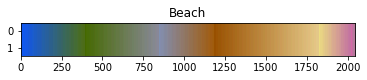

In [2]:
def mapDemo(filename):
    # read the map file
    with open(filename, "r") as infile:
        rgbs = np.array([list(map(float, line.split())) for line in infile.readlines()])
    # make cmap
    _cmap = ListedColormap(rgbs/255.0)
    # make demo figure
    gradient = np.linspace(0, 1, 2048)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots()
    ax.imshow(gradient, aspect=100, cmap=_cmap)
    #
    cmapName = filename.split("/")[-1].strip(".map")
    ax.set_title(cmapName)

# test
mapDemo("../data/colormaps/Beach.map")

/tmp/ipykernel_208478/3857929997.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


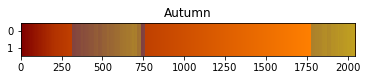

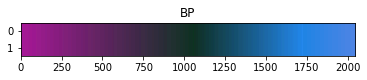

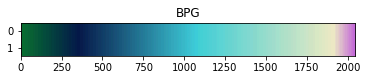

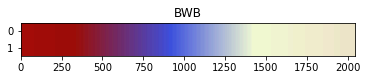

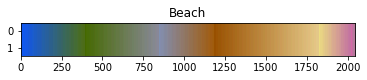

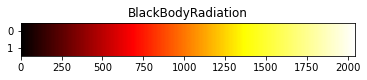

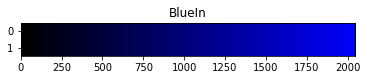

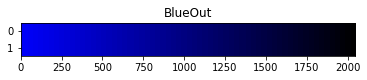

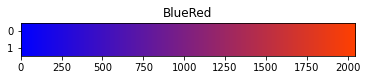

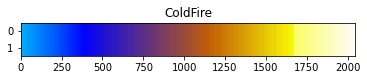

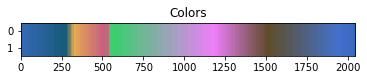

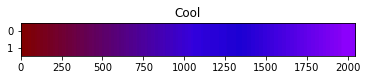

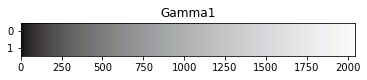

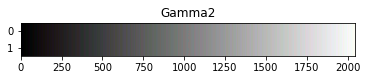

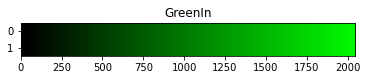

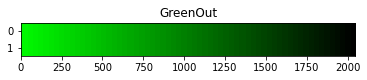

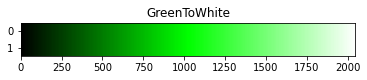

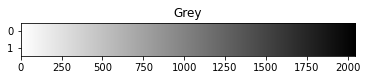

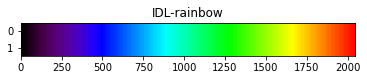

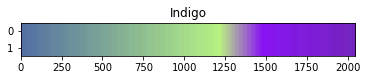

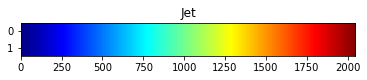

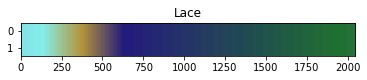

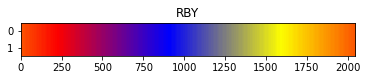

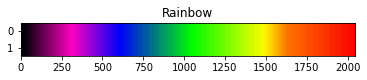

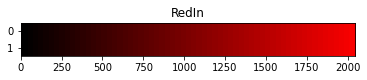

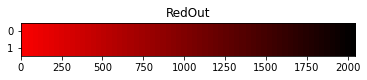

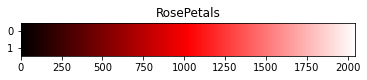

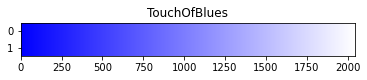

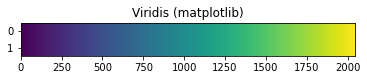

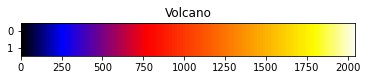

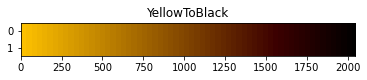

In [3]:
for mapfile in sorted(glob.glob("../data/colormaps/*.map")):
    try:
        mapDemo(mapfile)
    except:
        print(mapfile)

## .json file

- All_idl_cmaps.json
- All_slice_viewer_cmaps_for_vsi.json

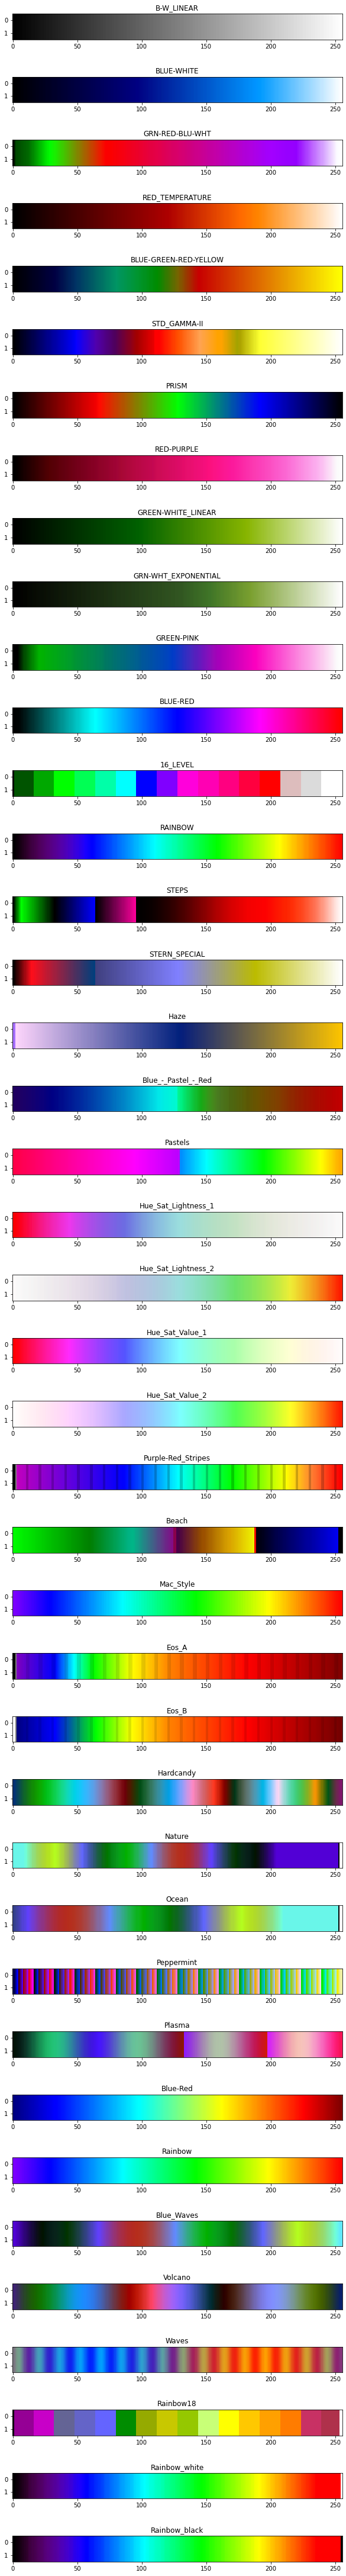

In [4]:
def jsonDemo(filename):
    # load data
    with open(filename, 'r') as infile:
        cmap_list = json.load(infile)
    #
    fig, axs = plt.subplots(len(cmap_list), 1, figsize=(10, 80))
    for i, me in enumerate(cmap_list):
        cmap_name = me["Name"]
        data = np.array(
            list(
                map(float,me["RGBPoints"])
            )
        )
        data = data.reshape((int(len(data)/4), 4))
        x = data[:,0].flatten()
        cmap = ListedColormap(data[:, 1:])
        #
        gradient = np.vstack((x,x))
        #
        axs[i].imshow(gradient, aspect=10, cmap=cmap)
        axs[i].set_title(cmap_name)

# test
jsonDemo("../data/colormaps/All_idl_cmaps.json")

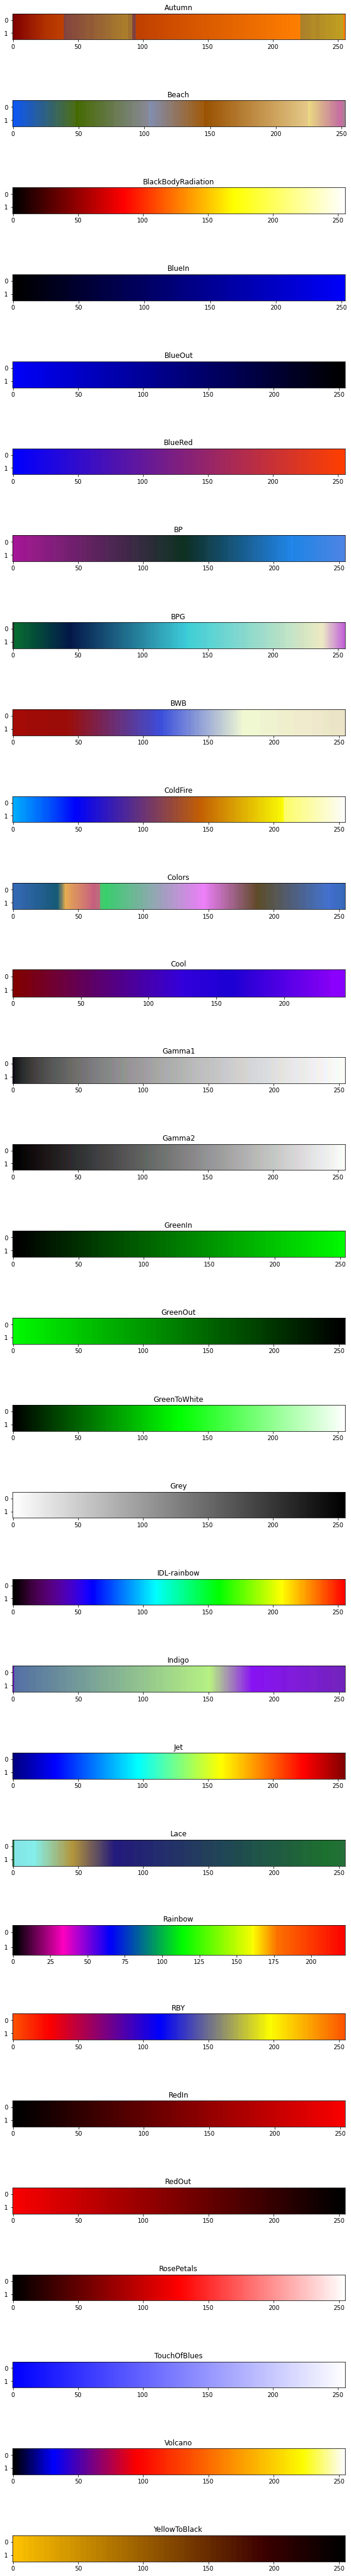

In [5]:
jsonDemo("../data/colormaps/All_slice_viewer_cmaps_for_vsi.json")